### Random number

Actually, random number is not really random, they come from a complicated formula, any pattern that you find is a sign for an alarm and it means that something is wrong. 

The way that people test the randomness of the formula is exactly in this way by plotting numbers. and seeing if there is a pattern. One of the most beautiful things that they do is this. You take first random number and the second random number. That's a vector in the $X-Y$ plane. Then you take the second and the third number, and you plot all those points. There is no pattern or relationship between $X$ and $Y$ on the visible.

But if you now do $X-Y-Z$  in 3 dimensional space, there is no pattern and just completely uniform. But with some of these random generators, if you make patterns of, say $27$ random numbers. So you take $27$ random numbers, it's a vector in in $27$ dimensional space, and then you take the second to the $28$ random numbers in $27$ dimensional. They show that these vectors lie in planes. which shows you there are very complicated relationships between the numbers.

Honestly, you used the formula to create the random numbers, there must be a relationship between the numbers. We can start the formula with the seed, or change the seed by hand, or allow the computer to make the seed with the clock. However, it’s too difficult to find the correlation.

generator actually works in a very interesting way, it creates a stream of bits:  $10101001100010111…$. It's endless. If there are 32 bits, it represents an **Unsigned Integer** in the range of $0-2^{32}-1$. However, in $C$ programming, we use **Signed Integers**. They use the first bit for the sign, and then 31 bits for the value. Therefore, the maximum number is 

$01111111111111111111111111111111$(there are thirty one 1).

Which is $2^{31}-1$. But if you go one more, or if you add one to it, it becomes

$100000000000000000000000000000000$, which is $-2^{31}$, a negative number.

Adding one to it, it becomes $100000000000000000000000000000001$, Which is $-2^{31}+1$.

And $11111111111111111111111111111111$(there are thirty two 1), which is -1.

how do we get a random number between 0 and one? We take the **Unsigned Integer** and divide it by $2^{32}$, so the random number is $[0,1)$, it never reaches 1.

Actually, these random numbers are not really continuous, you cannot get every float. The steps between every float is  $\dfrac{1}{2^{32}}$.


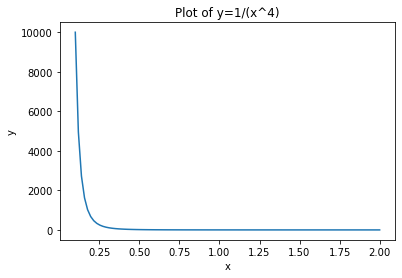

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def y(x):
    return 1/(x**4)

# Define the range of x values to plot
x = np.linspace(0.1, 2, 100)

# Calculate the corresponding y values
y_vals = y(x)

# Plot the function
plt.plot(x, y_vals)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y=1/(x^4)')

# Show the plot
plt.show()


$\int_{a}^{b}\dfrac{1}{x^4}$

if $a=1000, b=10000$, how to do numerical integration?

We know that these random numbers are not really continuous, you cannot get every float. The floats go in steps of $\dfrac{1}{2^{32}}$. However, if we want to use **Monte Carlo method** to calculate the numerical integration, the resolution in this kind of random number is only $\dfrac{1}{2^{32}}$, which is approximately $10^{-10}$. So use MC to generate random numbers in the definite integral are not uniform. The way to fix it is using 64 bits to generate high precision float. We can combine 2 random numbers like $x_1+\dfrac{x_2}{2^{32}}$, so we have 64 bit resolution.

See more in **IEEE standard for floating-point arithmetic**, it's a specific standard to define how we present numbers in computers and how accurate numbers can be.

https://www.wikiwand.com/en/IEEE_754

Now, in modern computing programs, double precision is the standard, that actually uses 64 bits for the floating point, which allows 16 decimal digits.

#### Monte Carlo numerical integration

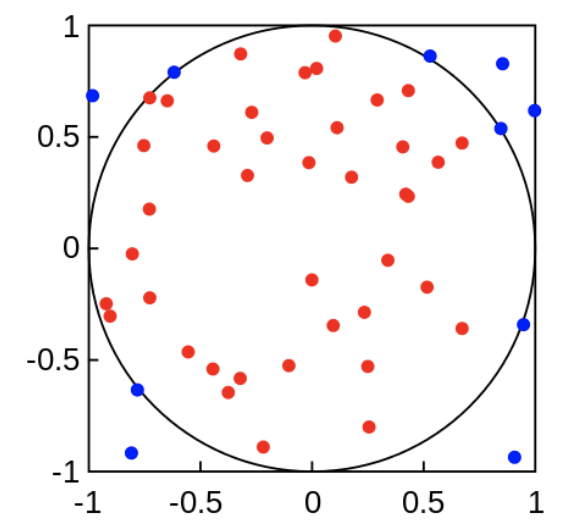

In [2]:
from numpy import random
import numpy as np

throws = 2000
inside_circle = 0
i = 0
radius = 1
while i < throws:
    # Choose random X and Y centered around 0,0
    x = random.uniform(-radius, radius)
    y = random.uniform(-radius, radius)
    # If the point is inside circle, increase variable
    if x**2 + y**2 <= radius**2:
        inside_circle += 1
    i += 1

# Calculate area and print; should be closer to Pi with increasing number of throws
area = (((2 * radius) ** 2) * inside_circle) / throws
print(area)

3.134


### How to add many numbers

Let's say that I want to add a lot of numbers, and some numbers are very small. but I have many of them, they are like $10^{-10}$, while some of them are very large, say $10^{10}$. The truth is, the order in which you add the numbers matters in computer. 

Firstly, if you add all the small numbers together, then you get a bigger number, it's not negligible, and then you add $10^{10}$, and it's still bigger.
However,  if you start from very big numbers, then the decimal point shifts. That's why it's called floating point. It means it can move left and right. So if you say, my first 2 numbers are $10^{12}$ and $10^{13}$. We have very big numbers and the floating point shifts to the left. Then, I also have $10^{-10}$, now that floating point is so far away that is 0, even if you have many of them, they all be 0, and they will be all neglected. 

In summary, the order in which you add the numbers matters  in floating points, If the numbers have very different magnitudes. We have to specify the order when we are programming.



### Accuracy

$a$ and $b$ are 10% accuracy, say

$a=10 \pm 1$

$b=9 \pm 0.9$ 

$c=a-b=1 \pm 1.9$

However, $c$ is not 10% accuracy, actually, it's 190%. This is a poorly designed experiment, an experiment in which the final answer there'll be 200% if you make every measurement with a 10% accuracy. So the rule is, avoid situations where you have to take the difference between 2 numbers that are very **close**,
